In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import row, column, gridplot, layout
from bokeh.models import Slider, Div
from bokeh.util.hex import hexbin
from bokeh.transform import linear_cmap
from bokeh.palettes import all_palettes

output_notebook()

Loading BokehJS ...

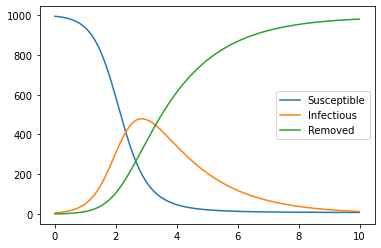

In [2]:
def sir(t, state, beta, gamma,N):
    S,I,R = state
    dS=-beta*I*S/N
    dI=beta*I*S/N-gamma*I
    dR=gamma*I   
    return [dS, dI, dR]

beta=3 #ilu ludzi spotyka przemnożone przez prawdopodobieństw0 zarażenia
gamma=0.6 #im mniejsze tym dłużej zaraża
N = 1000
p = (beta, gamma, N)  #parametry
y0 = [995, 5, 0]  # warunki początkowe
t = np.arange(0.0, 10.0, 0.01)

result = odeint(sir, y0, t, p, tfirst=True)
plt.plot(t, result[:, 0], label = 'Susceptible')
plt.plot(t, result[:, 1], label = 'Infectious')
plt.plot(t, result[:, 2], label = 'Removed')
plt.legend()

In [6]:
fig = figure(sizing_mode = 'stretch_width',
             aspect_ratio = 2,
             title = 'Zależności w modelu SIR',
             x_axis_label = 't',
             y_axis_label = 'Liczba osób')
fig.toolbar.logo = None
fig.toolbar.autohide = True
fig.grid.grid_line_dash = (5, 5)

fig.line(t, result[:, 0], color = 'pink', line_width = 3, legend_label = 'Susceptible')
fig.line(t, result[:, 1], color = 'magenta', line_width = 3, legend_label = 'Infectious')
fig.line(t, result[:, 2], color = 'orange', line_width = 3, legend_label = 'Removed/Recovered')

show(fig)